In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.layers import Normalization,Dense
from sklearn.preprocessing import LabelEncoder 

In [3]:
data = pd.read_csv('./car_price.csv')
print(data.shape)
data

(5512, 10)


,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...,...
5507,5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats


#### car company

In [6]:
# This code is for finding the name of the company.

company=[]
for name in data['car_name']:
    company.append(name.split(" ")[0])

In [8]:
# column name 'company is added to the dataframe.'

data['car_company']=company   

In [10]:
pd.unique(data['car_company'])

array(['Jeep', 'Renault', 'Toyota', 'Honda', 'Volkswagen', 'Maruti',
       'Mahindra', 'Hyundai', 'Nissan', 'Kia', 'MG', 'Tata', 'BMW',
       'Mercedes-Benz', 'Datsun', 'Volvo', 'Audi', 'Porsche', 'Ford',
       'Chevrolet', 'Skoda', 'Lexus', 'Land', 'Mini', 'Jaguar',
       'Mitsubishi', 'Force', 'Premier', 'Fiat', 'Maserati', 'Bentley',
       'Isuzu'], dtype=object)

In [12]:
data = data.iloc[:,1:]
data

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,car_company
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,Jeep
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,Renault
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,Toyota
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,Honda
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,Volkswagen
...,...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats,BMW
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats,BMW
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats,Jaguar
5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats,BMW


In [14]:
col = ['car_prices_in_rupee','car_company','kms_driven','fuel_type','transmission','ownership','manufacture','engine','Seats']
data = data.reindex(columns=col)

In [16]:
data

,car_prices_in_rupee,car_company,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,10.03 Lakh,Jeep,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,12.83 Lakh,Renault,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,16.40 Lakh,Toyota,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,7.77 Lakh,Honda,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,5.15 Lakh,Volkswagen,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...
5507,28.90 Lakh,BMW,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,64.90 Lakh,BMW,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,13.75 Lakh,Jaguar,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,29.90 Lakh,BMW,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats


In [18]:
pd.isnull(data).sum()

car_prices_in_rupee    0
car_company            0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [20]:
data.rename(columns={'Seats':'seats'},inplace=True)

In [22]:
pd.isnull(data).sum()

car_prices_in_rupee    0
car_company            0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
seats                  0
dtype: int64

In [24]:
print("\n",pd.unique(data['car_company']))
print("\n",pd.unique(data['car_prices_in_rupee']))
print("\n",pd.unique(data['kms_driven']))
print("\n",pd.unique(data['fuel_type']))
print("\n",pd.unique(data['transmission']))
print("\n",pd.unique(data['ownership']))
print("\n",pd.unique(data['manufacture']))
print("\n",pd.unique(data['engine']))
print("\n",pd.unique(data['seats']))


 ['Jeep' 'Renault' 'Toyota' 'Honda' 'Volkswagen' 'Maruti' 'Mahindra'
 'Hyundai' 'Nissan' 'Kia' 'MG' 'Tata' 'BMW' 'Mercedes-Benz' 'Datsun'
 'Volvo' 'Audi' 'Porsche' 'Ford' 'Chevrolet' 'Skoda' 'Lexus' 'Land' 'Mini'
 'Jaguar' 'Mitsubishi' 'Force' 'Premier' 'Fiat' 'Maserati' 'Bentley'
 'Isuzu']

 ['10.03 Lakh' '12.83 Lakh' '16.40 Lakh' ... '28.90 Lakh' '64.90 Lakh'
 '31.90 Lakh']

 ['86,226 kms' '13,248 kms' '60,343 kms' ... '1,54,000 kms' '79,718 kms'
 '85,002 kms']

 ['Diesel' 'Petrol' 'Cng' 'Electric' 'Lpg']

 ['Manual' 'Automatic']

 ['1st Owner' '2nd Owner' '3rd Owner' '4th Owner' '5th Owner' '0th Owner']

 [2017 2021 2016 2018 2015 2014 2020 2019 2012 2008 2013 2022 2010 2005
 2009 2006 2011 2007 2002 2004 1998 2003 1995 2000 2001 1999]

 ['1956 cc' '1330 cc' '2494 cc' '1199 cc' '1197 cc' '1498 cc' '1497 cc'
 '1368 cc' '1396 cc' '1373 cc' '1198 cc' '1462 cc' '799 cc' '998 cc'
 '1591 cc' '1999 cc' '999 cc' '814 cc' '796 cc' '1353 cc' '1451 cc'
 '1995 cc' '1991 cc' '2179 cc' '1798 cc'

#### Label Encoder for required columns

In [27]:
# le = LabelEncoder()
# d=data.iloc[:,[0,3,4,]]

# d=d.apply(LabelEncoder().fit_transform)

# print("\ncar_company: ",pd.unique(data['car_company']))
# print("\nfuel_type: ",pd.unique(data['fuel_type']))
# print("\ntransmission: ",pd.unique(data['transmission']))
# print("\n")
# print("\ncar_company: ",pd.unique(d['car_company']))
# print("\nfuel_type: ",pd.unique(d['fuel_type']))
# print("\ntransmission: ",pd.unique(d['transmission']))

# data.iloc[:,[0,3,4]]=d

# data

#### ownership

In [30]:
data[data['ownership']=='0th Owner'].shape  # by this we know that number of rows having ownership = 0th Owner is only 7.

(7, 9)

In [32]:
data['ownership'].replace(['0th Owner'],['1st Owner'],inplace=True)

In [34]:
print(pd.unique(data['ownership']))

['1st Owner' '2nd Owner' '3rd Owner' '4th Owner' '5th Owner']


In [36]:
# le_ownership = LabelEncoder()
# data['ownership'] = le_ownership.fit_transform(data['ownership'])

In [38]:
# data['ownership'].unique()

In [40]:
data['ownership'].replace(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner' ,'5th Owner'],[1,2,3,4,5],inplace=True)

In [42]:
print(pd.unique(data['ownership']))

[1 2 3 4 5]


#### Seats

In [45]:
data['seats'].replace(['5 Seats', '6 Seats' ,'7 Seats' ,'4 Seats', '8 Seats', '2 Seats'],[5,6,7,4,8,2],inplace=True)

In [47]:
print("\n",pd.unique(data['seats']))


 [5 6 7 4 8 2]


#### Transmission

In [50]:
# data['transmission'].replace(['Manual', 'Automatic'],[0,1],inplace=True)

In [52]:
# print("\n",pd.unique(data['transmission']))

#### Car price in rupees

In [55]:
d = data.copy()
d.shape
data

,car_prices_in_rupee,car_company,kms_driven,fuel_type,transmission,ownership,manufacture,engine,seats
0,10.03 Lakh,Jeep,"86,226 kms",Diesel,Manual,1,2017,1956 cc,5
1,12.83 Lakh,Renault,"13,248 kms",Petrol,Automatic,1,2021,1330 cc,5
2,16.40 Lakh,Toyota,"60,343 kms",Petrol,Automatic,1,2016,2494 cc,5
3,7.77 Lakh,Honda,"26,696 kms",Petrol,Automatic,1,2018,1199 cc,5
4,5.15 Lakh,Volkswagen,"69,414 kms",Petrol,Manual,1,2016,1199 cc,5
...,...,...,...,...,...,...,...,...,...
5507,28.90 Lakh,BMW,"45,000 kms",Diesel,Automatic,1,2018,2995 cc,7
5508,64.90 Lakh,BMW,"29,000 kms",Petrol,Automatic,2,2015,1968 cc,5
5509,13.75 Lakh,Jaguar,"90,000 kms",Diesel,Automatic,2,2013,2755 cc,5
5510,29.90 Lakh,BMW,"79,000 kms",Diesel,Automatic,3,2015,2967 cc,6


In [57]:
d['car_price_in_lakh'] = d['car_prices_in_rupee'].str.count("Lakh")
print(d[d['car_price_in_lakh']==1].shape)
d[d['car_price_in_lakh']==1]   # gives those cars whose price is in lakhs

(5333, 10)


,car_prices_in_rupee,car_company,kms_driven,fuel_type,transmission,ownership,manufacture,engine,seats,car_price_in_lakh
0,10.03 Lakh,Jeep,"86,226 kms",Diesel,Manual,1,2017,1956 cc,5,1
1,12.83 Lakh,Renault,"13,248 kms",Petrol,Automatic,1,2021,1330 cc,5,1
2,16.40 Lakh,Toyota,"60,343 kms",Petrol,Automatic,1,2016,2494 cc,5,1
3,7.77 Lakh,Honda,"26,696 kms",Petrol,Automatic,1,2018,1199 cc,5,1
4,5.15 Lakh,Volkswagen,"69,414 kms",Petrol,Manual,1,2016,1199 cc,5,1
...,...,...,...,...,...,...,...,...,...,...
5507,28.90 Lakh,BMW,"45,000 kms",Diesel,Automatic,1,2018,2995 cc,7,1
5508,64.90 Lakh,BMW,"29,000 kms",Petrol,Automatic,2,2015,1968 cc,5,1
5509,13.75 Lakh,Jaguar,"90,000 kms",Diesel,Automatic,2,2013,2755 cc,5,1
5510,29.90 Lakh,BMW,"79,000 kms",Diesel,Automatic,3,2015,2967 cc,6,1


In [59]:
print(d[d['car_price_in_lakh']==0].shape)
d[d['car_price_in_lakh']==0]  # gives those cars whose price is not in lakhs may be in crore or thousands.

(179, 10)


,car_prices_in_rupee,car_company,kms_driven,fuel_type,transmission,ownership,manufacture,engine,seats,car_price_in_lakh
119,1.10 Crore,Land,"33,000 kms",Petrol,Automatic,1,2021,1997 cc,7,0
238,"99,999",Maruti,"80,000 kms",Petrol,Manual,3,2007,1298 cc,5,0
243,"55,000",Maruti,"90,000 kms",Petrol,Manual,3,2002,993 cc,5,0
315,1.23 Crore,BMW,"13,000 kms",Petrol,Automatic,1,2019,2998 cc,7,0
342,"84,778",Maruti,"70,229 kms",Petrol,Manual,4,2008,796 cc,5,0
...,...,...,...,...,...,...,...,...,...,...
5438,1.14 Crore,Land,"19,500 kms",Petrol,Automatic,1,2020,1991 cc,5,0
5439,"80,000",Maruti,"1,20,000 kms",Diesel,Manual,3,2005,1248 cc,5,0
5458,1.69 Crore,Toyota,"27,000 kms",Diesel,Automatic,1,2019,2143 cc,5,0
5482,1.52 Crore,Mercedes-Benz,"47,000 kms",Petrol,Automatic,2,2017,1991 cc,5,0


In [61]:
d['car_price_in_crore'] = d['car_prices_in_rupee'].str.count("Crore")
print(d[d['car_price_in_crore']==1].shape)
d[d['car_price_in_crore']==1]   #gives those cars whose price is in crores.

(56, 11)


,car_prices_in_rupee,car_company,kms_driven,fuel_type,transmission,ownership,manufacture,engine,seats,car_price_in_lakh,car_price_in_crore
119,1.10 Crore,Land,"33,000 kms",Petrol,Automatic,1,2021,1997 cc,7,0,1
315,1.23 Crore,BMW,"13,000 kms",Petrol,Automatic,1,2019,2998 cc,7,0,1
857,1.58 Crore,Toyota,"56,000 kms",Diesel,Automatic,1,2018,2393 cc,5,0,1
869,1.17 Crore,Mercedes-Benz,"15,000 kms",Diesel,Automatic,2,2020,999 cc,5,0,1
892,1.92 Crore,Land,"40,000 kms",Petrol,Automatic,1,2019,1199 cc,5,0,1
928,1.69 Crore,Toyota,"27,000 kms",Diesel,Automatic,1,2019,796 cc,5,0,1
952,1.77 Crore,Mercedes-Benz,"1,400 kms",Diesel,Automatic,1,2022,2499 cc,7,0,1
1073,1.52 Crore,Mercedes-Benz,"47,000 kms",Petrol,Automatic,2,2017,1199 cc,5,0,1
1074,1.75 Crore,Porsche,"10,000 kms",Petrol,Automatic,1,2019,1950 cc,5,0,1
1167,1 Crore,BMW,"20,500 kms",Diesel,Automatic,1,2022,1995 cc,5,0,1


In [63]:
check=['car_price_in_crore','car_price_in_lakh']
print(d[(d[check]==0).all(axis=1)].shape)
d[(d[check]==0).all(axis=1)]      #gives those cars whose price is in thousands.

(123, 11)


,car_prices_in_rupee,car_company,kms_driven,fuel_type,transmission,ownership,manufacture,engine,seats,car_price_in_lakh,car_price_in_crore
238,"99,999",Maruti,"80,000 kms",Petrol,Manual,3,2007,1298 cc,5,0,0
243,"55,000",Maruti,"90,000 kms",Petrol,Manual,3,2002,993 cc,5,0,0
342,"84,778",Maruti,"70,229 kms",Petrol,Manual,4,2008,796 cc,5,0,0
675,"59,000",Maruti,"60,000 kms",Petrol,Manual,1,2007,1497 cc,5,0,0
734,"90,000",Hyundai,"80,000 kms",Petrol,Manual,2,2008,2993 cc,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5050,"82,642",Maruti,"1,66,155 kms",Petrol,Manual,2,2008,1461 cc,5,0,0
5094,"73,582",Chevrolet,"89,133 kms",Petrol,Manual,1,2009,1497 cc,5,0,0
5149,"59,736",Chevrolet,"1,92,340 kms",Lpg,Manual,2,2010,1390 cc,5,0,0
5177,"95,633",Tata,"1,30,265 kms",Diesel,Manual,2,2013,1197 cc,5,0,0


In [65]:
temp = d['car_prices_in_rupee']
temp

0       10.03 Lakh
1       12.83 Lakh
2       16.40 Lakh
3        7.77 Lakh
4        5.15 Lakh
           ...    
5507    28.90 Lakh
5508    64.90 Lakh
5509    13.75 Lakh
5510    29.90 Lakh
5511    31.90 Lakh
Name: car_prices_in_rupee, Length: 5512, dtype: object

In [67]:
def convert_into_lakhs(value):
    # print(type(value))
    if('Lakh' in value):
        number = float(value.replace('Lakh','').strip())
        return number
    elif('Crore' in value):
        number = float(value.replace('Crore','').strip())
        return number*100
    else:
        number = float(value.replace(',','').strip())
        return number/100000

In [69]:
temp = temp.apply(convert_into_lakhs)

In [71]:
temp = round(temp,3)

In [73]:
temp

0       10.03
1       12.83
2       16.40
3        7.77
4        5.15
        ...  
5507    28.90
5508    64.90
5509    13.75
5510    29.90
5511    31.90
Name: car_prices_in_rupee, Length: 5512, dtype: float64

In [75]:
data['car_prices_in_rupee'] = temp
data.rename(columns={'car_prices_in_rupee':'car_prices_in_lakhs'},inplace=True)

In [77]:
data['car_prices_in_lakhs'][243]

0.55

#### kms_driven

In [80]:
temp = data['kms_driven'].str.count('kms')
temp[temp==1].count()

5512

In [82]:
replaced = {
    ' kms':'',
    ',' : ''
}
x = data['kms_driven'].replace(replaced,regex=True).astype(float)
data['kms_driven'] = x

In [84]:
data

,car_prices_in_lakhs,car_company,kms_driven,fuel_type,transmission,ownership,manufacture,engine,seats
0,10.03,Jeep,86226.0,Diesel,Manual,1,2017,1956 cc,5
1,12.83,Renault,13248.0,Petrol,Automatic,1,2021,1330 cc,5
2,16.40,Toyota,60343.0,Petrol,Automatic,1,2016,2494 cc,5
3,7.77,Honda,26696.0,Petrol,Automatic,1,2018,1199 cc,5
4,5.15,Volkswagen,69414.0,Petrol,Manual,1,2016,1199 cc,5
...,...,...,...,...,...,...,...,...,...
5507,28.90,BMW,45000.0,Diesel,Automatic,1,2018,2995 cc,7
5508,64.90,BMW,29000.0,Petrol,Automatic,2,2015,1968 cc,5
5509,13.75,Jaguar,90000.0,Diesel,Automatic,2,2013,2755 cc,5
5510,29.90,BMW,79000.0,Diesel,Automatic,3,2015,2967 cc,6


<Axes: xlabel='manufacture', ylabel='kms_driven'>

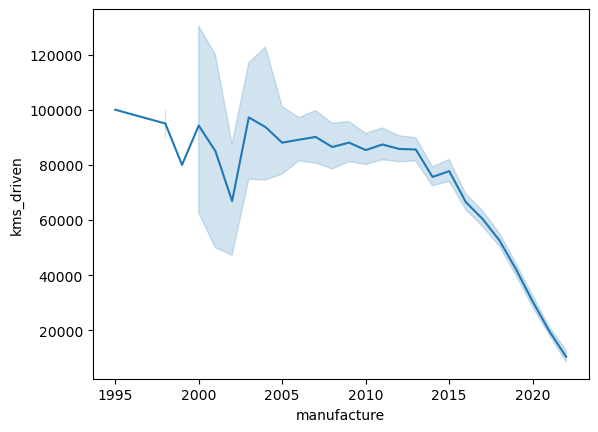

In [86]:
sns.lineplot(data=data,x='manufacture',y='kms_driven')

#### fuel_type

In [89]:
# data['fuel_type'].unique()

In [91]:
# data['fuel_type'].replace(['Diesel', 'Petrol', 'Cng', 'Electric', 'Lpg'],[1,2,3,4,5],inplace=True)
data

,car_prices_in_lakhs,car_company,kms_driven,fuel_type,transmission,ownership,manufacture,engine,seats
0,10.03,Jeep,86226.0,Diesel,Manual,1,2017,1956 cc,5
1,12.83,Renault,13248.0,Petrol,Automatic,1,2021,1330 cc,5
2,16.40,Toyota,60343.0,Petrol,Automatic,1,2016,2494 cc,5
3,7.77,Honda,26696.0,Petrol,Automatic,1,2018,1199 cc,5
4,5.15,Volkswagen,69414.0,Petrol,Manual,1,2016,1199 cc,5
...,...,...,...,...,...,...,...,...,...
5507,28.90,BMW,45000.0,Diesel,Automatic,1,2018,2995 cc,7
5508,64.90,BMW,29000.0,Petrol,Automatic,2,2015,1968 cc,5
5509,13.75,Jaguar,90000.0,Diesel,Automatic,2,2013,2755 cc,5
5510,29.90,BMW,79000.0,Diesel,Automatic,3,2015,2967 cc,6


In [93]:
data.agg({
    'engine':['min','max']
})

,engine
min,0 cc
max,999 cc


#### Engine

In [96]:
x = data['engine'].str.count('cc')
x[x==1].count()

5512

In [98]:
x = data['engine'].str.replace(' cc','').astype(float)
data['engine'] = x

In [100]:
data.rename(columns={
    'engine' : 'engine_in_cc',
    'manufacture':'manufacture_year'
},inplace=True)

In [102]:
data.agg({
    'engine_in_cc':['min','max']
})

,engine_in_cc
min,0.0
max,5950.0


#### Fuel_Type

In [105]:
# data['fuel_type'].unique()

In [107]:
# data['fuel_type'].replace(['Diesel', 'Petrol', 'Cng', 'Electric', 'Lpg'],[1,2,3,4,5],inplace=True)

In [109]:
data

,car_prices_in_lakhs,car_company,kms_driven,fuel_type,transmission,ownership,manufacture_year,engine_in_cc,seats
0,10.03,Jeep,86226.0,Diesel,Manual,1,2017,1956.0,5
1,12.83,Renault,13248.0,Petrol,Automatic,1,2021,1330.0,5
2,16.40,Toyota,60343.0,Petrol,Automatic,1,2016,2494.0,5
3,7.77,Honda,26696.0,Petrol,Automatic,1,2018,1199.0,5
4,5.15,Volkswagen,69414.0,Petrol,Manual,1,2016,1199.0,5
...,...,...,...,...,...,...,...,...,...
5507,28.90,BMW,45000.0,Diesel,Automatic,1,2018,2995.0,7
5508,64.90,BMW,29000.0,Petrol,Automatic,2,2015,1968.0,5
5509,13.75,Jaguar,90000.0,Diesel,Automatic,2,2013,2755.0,5
5510,29.90,BMW,79000.0,Diesel,Automatic,3,2015,2967.0,6


#### Transmission

In [112]:
# data['transmission'].unique()

In [114]:
# data['transmission'].replace(['Manual', 'Automatic'],[0,1],inplace=True)

In [116]:
data

,car_prices_in_lakhs,car_company,kms_driven,fuel_type,transmission,ownership,manufacture_year,engine_in_cc,seats
0,10.03,Jeep,86226.0,Diesel,Manual,1,2017,1956.0,5
1,12.83,Renault,13248.0,Petrol,Automatic,1,2021,1330.0,5
2,16.40,Toyota,60343.0,Petrol,Automatic,1,2016,2494.0,5
3,7.77,Honda,26696.0,Petrol,Automatic,1,2018,1199.0,5
4,5.15,Volkswagen,69414.0,Petrol,Manual,1,2016,1199.0,5
...,...,...,...,...,...,...,...,...,...
5507,28.90,BMW,45000.0,Diesel,Automatic,1,2018,2995.0,7
5508,64.90,BMW,29000.0,Petrol,Automatic,2,2015,1968.0,5
5509,13.75,Jaguar,90000.0,Diesel,Automatic,2,2013,2755.0,5
5510,29.90,BMW,79000.0,Diesel,Automatic,3,2015,2967.0,6


[]

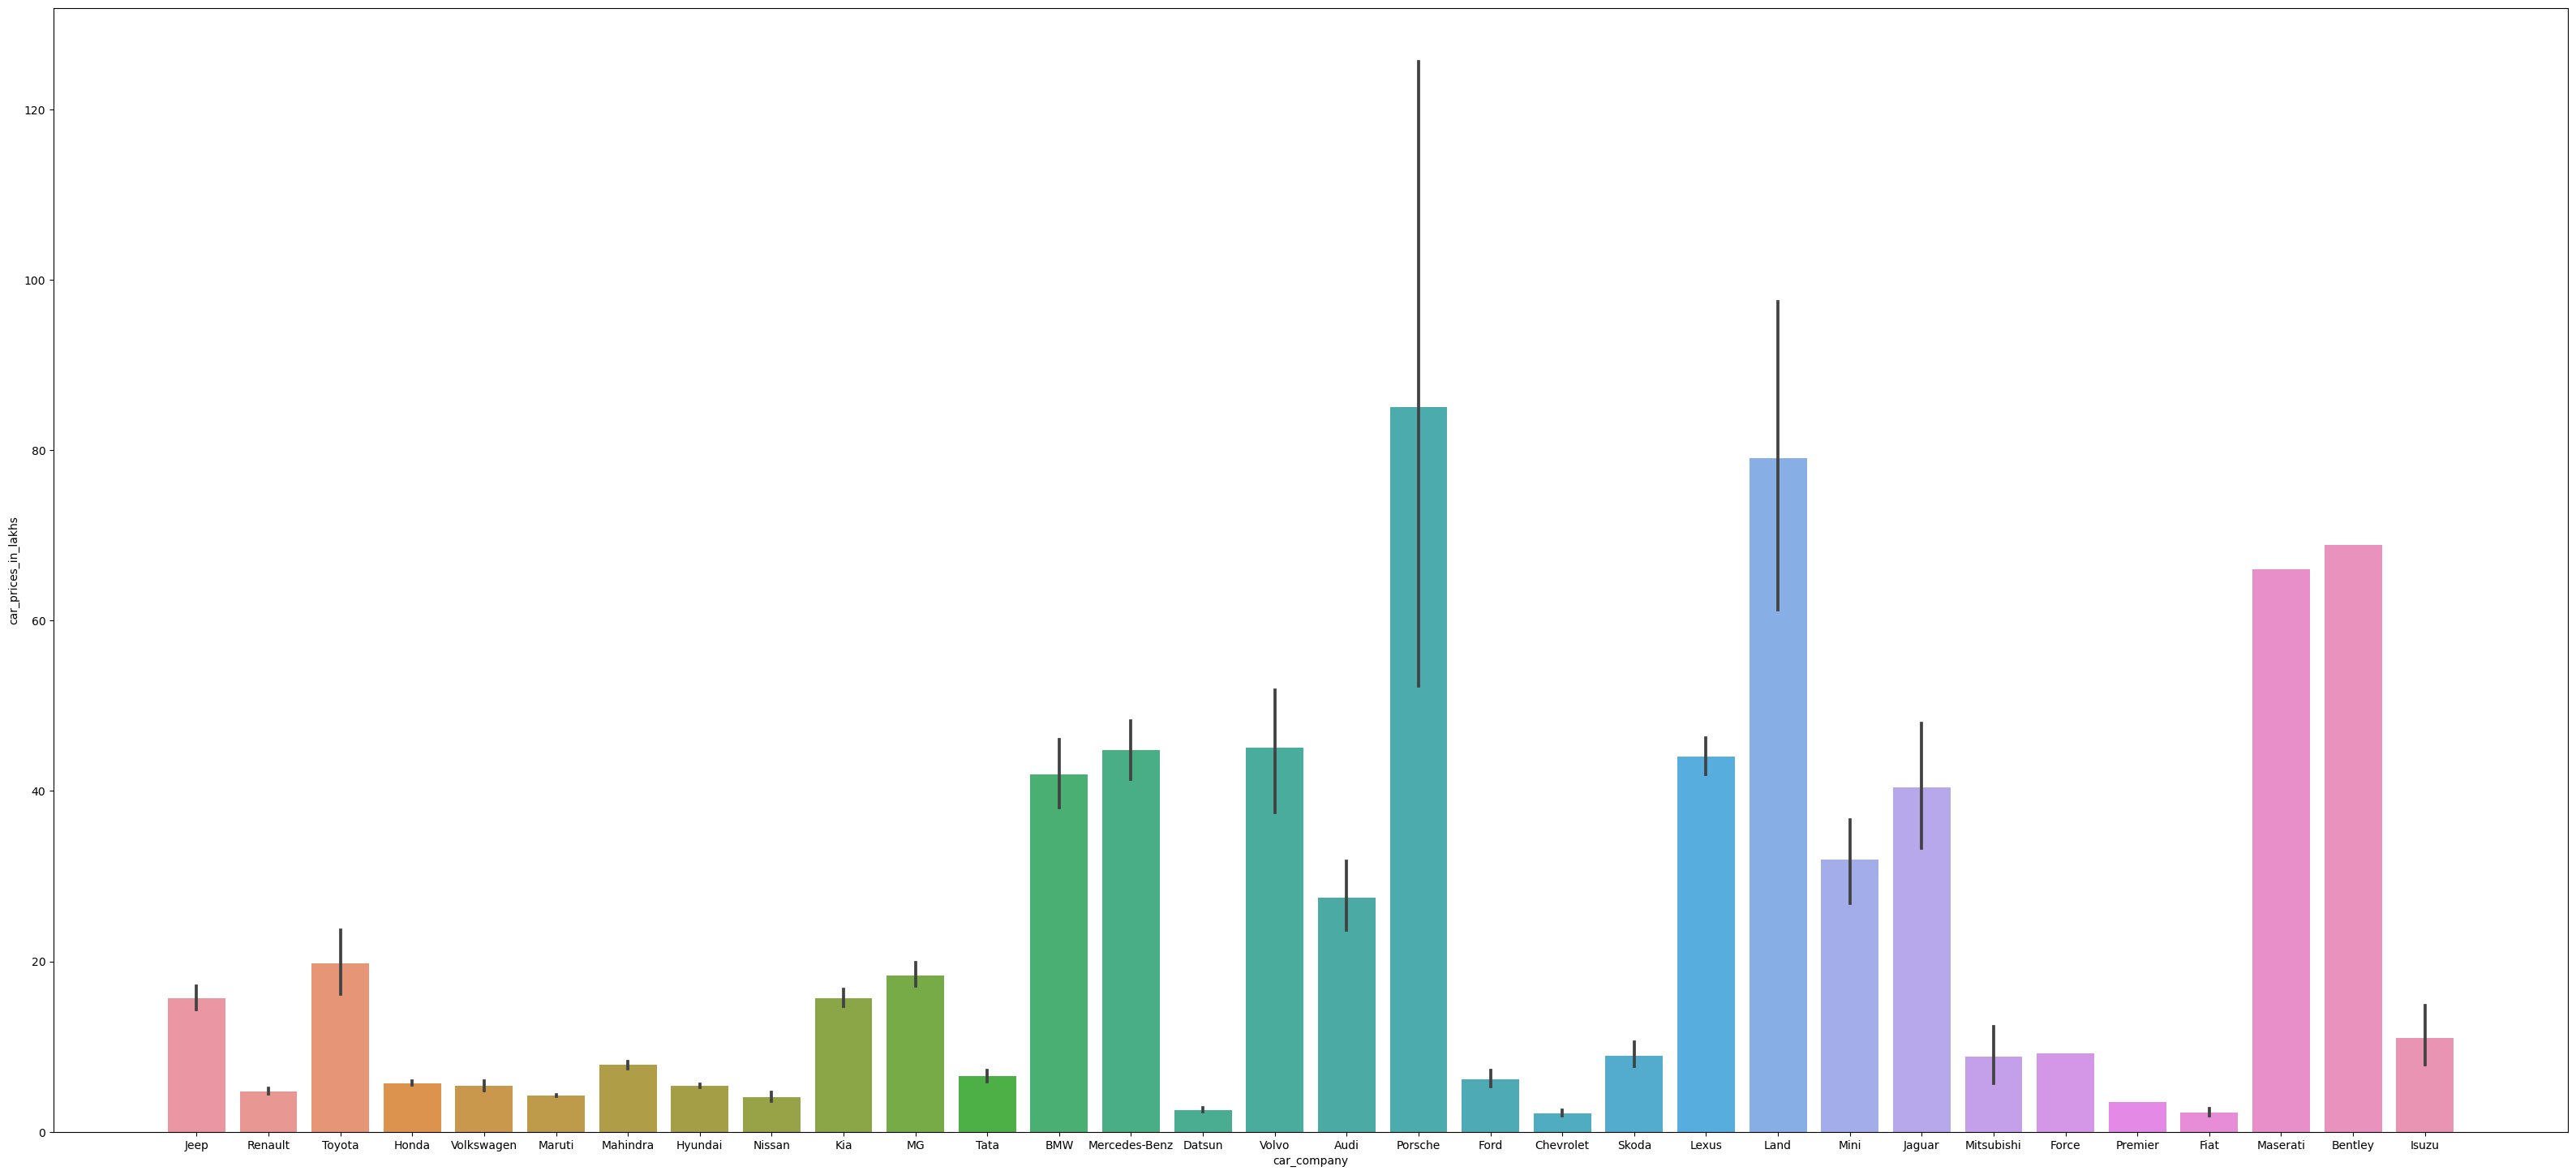

In [118]:
plt.figure(figsize=(40,18))
sns.barplot(data=data,x='car_company',y='car_prices_in_lakhs')
plt.plot()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


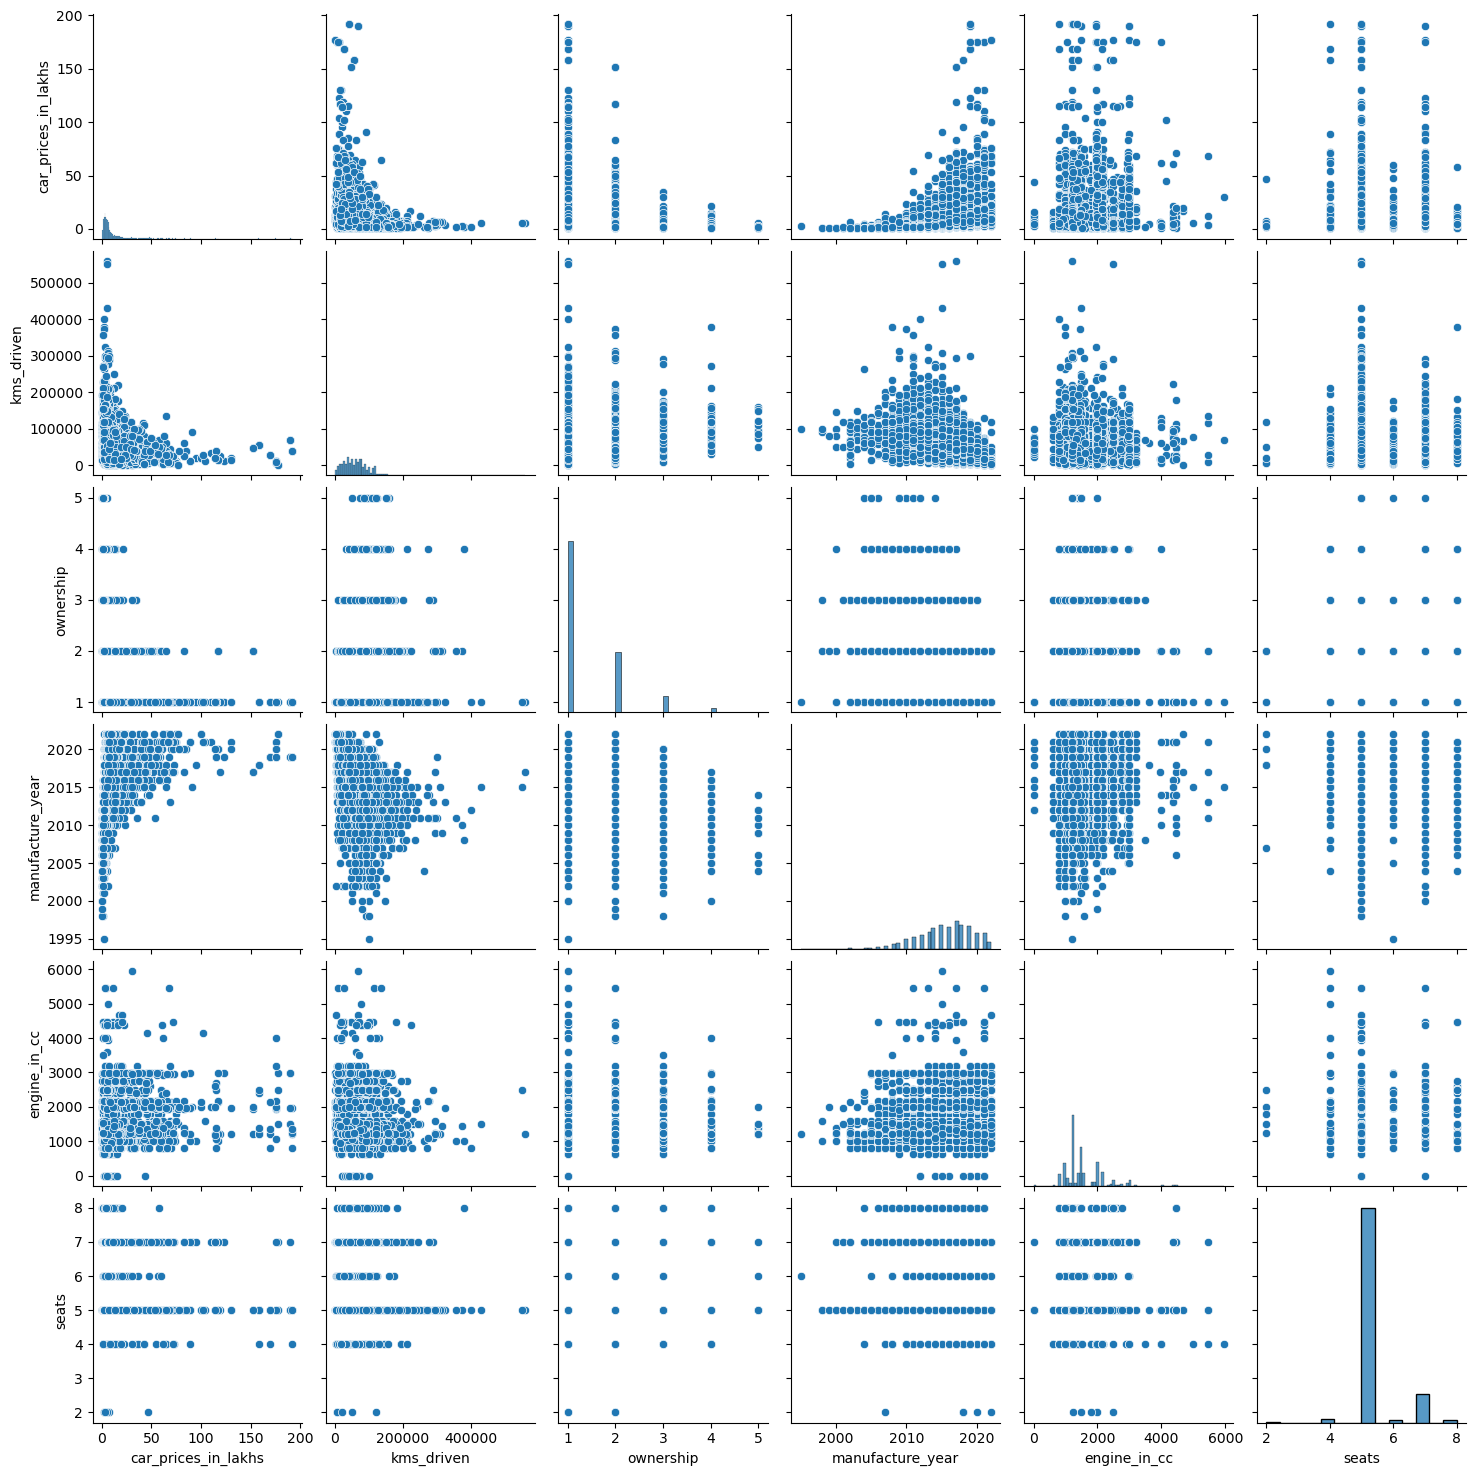

In [119]:
sns.pairplot(data=data)

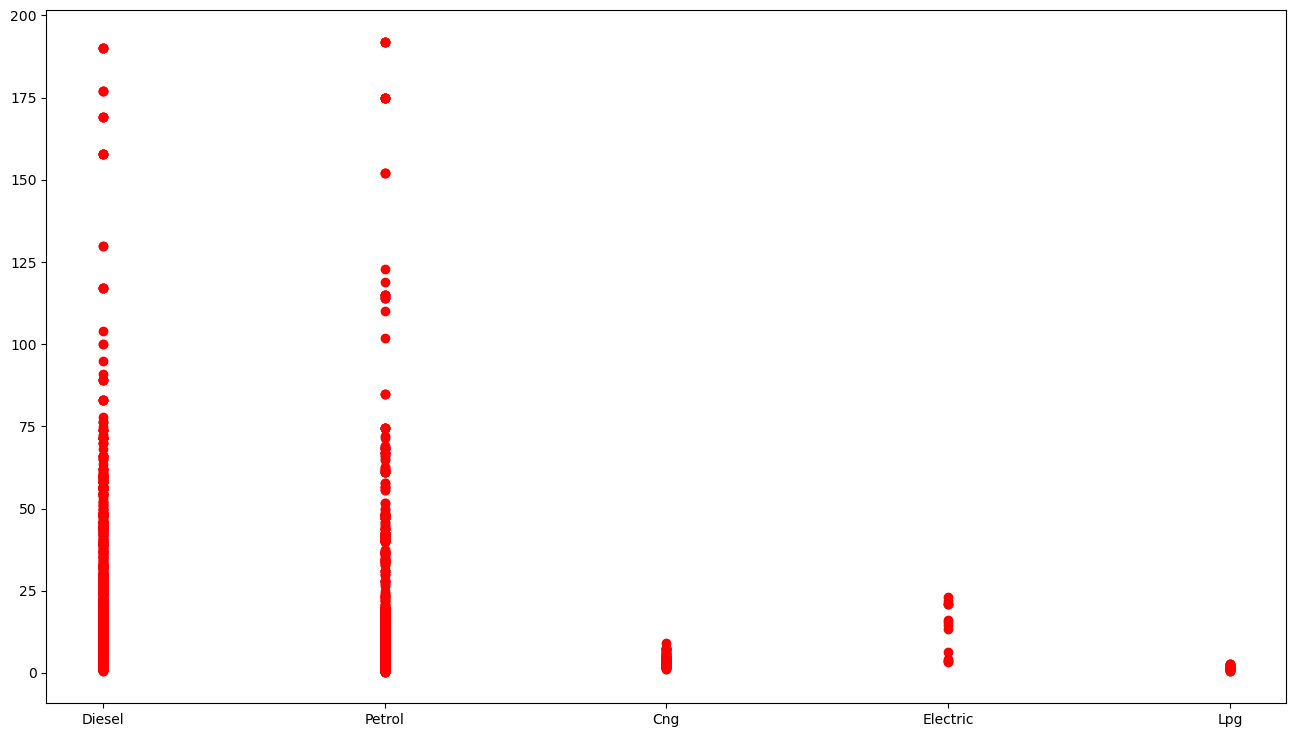

In [120]:
plt.figure(figsize=(16,9))
plt.plot('fuel_type','car_prices_in_lakhs','ro',data=data)
plt.show()

In [124]:
data

,car_prices_in_lakhs,car_company,kms_driven,fuel_type,transmission,ownership,manufacture_year,engine_in_cc,seats
0,10.03,Jeep,86226.0,Diesel,Manual,1,2017,1956.0,5
1,12.83,Renault,13248.0,Petrol,Automatic,1,2021,1330.0,5
2,16.40,Toyota,60343.0,Petrol,Automatic,1,2016,2494.0,5
3,7.77,Honda,26696.0,Petrol,Automatic,1,2018,1199.0,5
4,5.15,Volkswagen,69414.0,Petrol,Manual,1,2016,1199.0,5
...,...,...,...,...,...,...,...,...,...
5507,28.90,BMW,45000.0,Diesel,Automatic,1,2018,2995.0,7
5508,64.90,BMW,29000.0,Petrol,Automatic,2,2015,1968.0,5
5509,13.75,Jaguar,90000.0,Diesel,Automatic,2,2013,2755.0,5
5510,29.90,BMW,79000.0,Diesel,Automatic,3,2015,2967.0,6


In [126]:
data.to_csv('./Updated_data_car_price_prediction.csv')

In [128]:
data = data.iloc[:,1:]

In [130]:
data

,car_company,kms_driven,fuel_type,transmission,ownership,manufacture_year,engine_in_cc,seats
0,Jeep,86226.0,Diesel,Manual,1,2017,1956.0,5
1,Renault,13248.0,Petrol,Automatic,1,2021,1330.0,5
2,Toyota,60343.0,Petrol,Automatic,1,2016,2494.0,5
3,Honda,26696.0,Petrol,Automatic,1,2018,1199.0,5
4,Volkswagen,69414.0,Petrol,Manual,1,2016,1199.0,5
...,...,...,...,...,...,...,...,...
5507,BMW,45000.0,Diesel,Automatic,1,2018,2995.0,7
5508,BMW,29000.0,Petrol,Automatic,2,2015,1968.0,5
5509,Jaguar,90000.0,Diesel,Automatic,2,2013,2755.0,5
5510,BMW,79000.0,Diesel,Automatic,3,2015,2967.0,6


In [65]:
tensor_data = tf.constant(data)
tensor_data

<tf.Tensor: shape=(5512, 8), dtype=float64, numpy=
array([[1.0030e+01, 8.6226e+04, 1.0000e+00, ..., 2.0170e+03, 1.9560e+03,
        5.0000e+00],
       [1.2830e+01, 1.3248e+04, 2.0000e+00, ..., 2.0210e+03, 1.3300e+03,
        5.0000e+00],
       [1.6400e+01, 6.0343e+04, 2.0000e+00, ..., 2.0160e+03, 2.4940e+03,
        5.0000e+00],
       ...,
       [1.3750e+01, 9.0000e+04, 1.0000e+00, ..., 2.0130e+03, 2.7550e+03,
        5.0000e+00],
       [2.9900e+01, 7.9000e+04, 1.0000e+00, ..., 2.0150e+03, 2.9670e+03,
        6.0000e+00],
       [3.1900e+01, 4.2000e+04, 1.0000e+00, ..., 2.0170e+03, 1.9910e+03,
        5.0000e+00]])>

In [66]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data

<tf.Tensor: shape=(5512, 8), dtype=float64, numpy=
array([[1.35200e+01, 1.20422e+05, 1.00000e+00, ..., 2.01700e+03,
        9.98000e+02, 5.00000e+00],
       [1.13000e+00, 1.00694e+05, 2.00000e+00, ..., 2.00800e+03,
        1.19700e+03, 5.00000e+00],
       [4.00000e+00, 1.32596e+05, 2.00000e+00, ..., 2.00400e+03,
        9.93000e+02, 5.00000e+00],
       ...,
       [5.54000e+00, 8.64180e+04, 1.00000e+00, ..., 2.01700e+03,
        1.79800e+03, 5.00000e+00],
       [3.65000e+00, 8.29900e+04, 1.00000e+00, ..., 2.01400e+03,
        1.49700e+03, 5.00000e+00],
       [4.00000e+00, 9.00000e+04, 1.00000e+00, ..., 2.01600e+03,
        1.49700e+03, 5.00000e+00]])>

In [67]:
X = tensor_data[:,1:]
X

<tf.Tensor: shape=(5512, 7), dtype=float64, numpy=
array([[1.20422e+05, 1.00000e+00, 0.00000e+00, ..., 2.01700e+03,
        9.98000e+02, 5.00000e+00],
       [1.00694e+05, 2.00000e+00, 0.00000e+00, ..., 2.00800e+03,
        1.19700e+03, 5.00000e+00],
       [1.32596e+05, 2.00000e+00, 0.00000e+00, ..., 2.00400e+03,
        9.93000e+02, 5.00000e+00],
       ...,
       [8.64180e+04, 1.00000e+00, 0.00000e+00, ..., 2.01700e+03,
        1.79800e+03, 5.00000e+00],
       [8.29900e+04, 1.00000e+00, 0.00000e+00, ..., 2.01400e+03,
        1.49700e+03, 5.00000e+00],
       [9.00000e+04, 1.00000e+00, 0.00000e+00, ..., 2.01600e+03,
        1.49700e+03, 5.00000e+00]])>

In [3]:
y = tensor_data[:,0]
y = tf.expand_dims(y,axis=-1)
y

NameError: name 'tensor_data' is not defined

In [ ]:
normalizer = Normalization(mean=3,variance=5)
x_temp = tf.constant([[3,4,2,8],
                     [4,7,2,9,],
                     [2,3,4,5]])
normalizer